# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Height-Weight Data.csv')

In [3]:
df.head(5)                          #It will show first 5 data from the data sheet

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [4]:
df.tail(5)                       #It will show first 5 data from the data sheet

,Height,Weight
3496,69.296830,185.649086
3497,70.542201,210.198845
3498,73.912549,202.429960
3499,67.396021,144.277671
3500,72.738970,187.222909


In [5]:
df.shape                      #Information about row and columns 

(3501, 2)

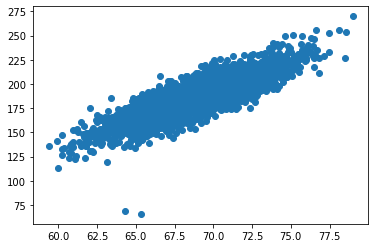

In [6]:
plt.scatter(df['Height'], df['Weight'])           #Plot 2D graph for independent data(Height) and dependent data(Weight)

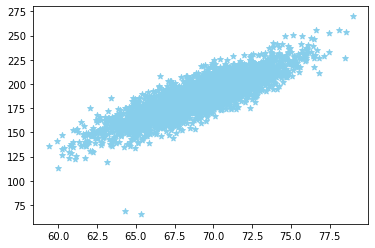

In [7]:
plt.scatter(df['Height'], df['Weight'], color='skyblue', marker='*')     #Plot 2D graph for independent data(Height) and dependent data(Weight) with color and marker

Text(0.5, 1.0, 'Weight Prediction')

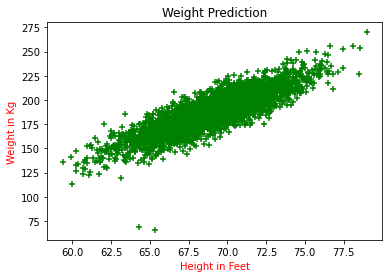

In [8]:
plt.scatter(df.Height, df.Weight, color='green', marker='+')
plt.xlabel('Height in Feet', color='red')
plt.ylabel('Weight in Kg', color='red')
plt.title('Weight Prediction', color='black') #labeling the x axis and y axis 

In [9]:
df.Height.mean()           #by mean function we find out the mean value of Height from given data set

69.02441087268797

In [10]:
df.Weight.mean()          #by mean function we find out the mean value of Weight from given data set

186.89125797946284

# Seperate dependent and independend variable

In [11]:
x = df[['Height']]                #separated Height from the data sheet for testing and training
 

In [12]:
y = df['Weight']                  #separated Weight from the data sheet for testing and training

In [13]:
x.head(5)                        #show the first 5 Height values from separated data

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796


In [14]:
y.head(5)                      #show the first 5 Weight values from separated data

0    241.893563
1    162.310473
2    212.740856
3    220.042470
4    206.349801
Name: Weight, dtype: float64

In [15]:
df.shape

(3501, 2)

# Split the dataset

In [16]:
from sklearn.model_selection import train_test_split    #Import librery for training and testing

In [17]:
xtrain, xtest, ytrain, ytest =train_test_split(x, y, test_size=.30)   #Train 70% data from Height Table

In [18]:
xtrain.head(5)                           #show the first 5 train height values from separated data

,Height
1546,67.940578
2384,71.579696
1184,66.601283
2741,68.868750
158,68.593336


In [19]:
xtest.head(5)                             #show the first 5 test height values from separated data

,Height
2029,67.040590
853,70.613162
3100,69.477410
1618,74.633827
1720,66.914894


In [20]:
xtrain.shape                          # 70% train data

(2450, 1)

In [21]:
xtest.shape                          # 30% test data

(1051, 1)

# Linear Regression

In [22]:
from sklearn.linear_model import LinearRegression      #for linear regression import library

In [23]:
reg=LinearRegression()                               

In [24]:
reg.fit(xtrain, ytrain)                              #train the data

LinearRegression()

In [25]:
reg.predict([[100]])                              #Predict weight for 100 feet Height

array([372.95549977])

In [26]:
ytest.head(5)                        

2029    188.605099
853     187.472024
3100    191.763852
1618    213.069042
1720    169.882490
Name: Weight, dtype: float64

In [27]:
ypred=reg.predict(xtest)

In [28]:
ypred

array([174.91943541, 196.38517834, 189.56102853, ..., 167.6092803 ,
       205.31396855, 171.51076777])

In [29]:
from sklearn.metrics import mean_squared_error

In [30]:
mse=mean_squared_error(ytest, ypred)

In [31]:
mse                                                #find out the mean squared error

117.00744985927872

In [32]:
from sklearn.metrics import mean_absolute_error

In [33]:
mae=mean_absolute_error(ytest, ypred)


In [34]:
mae                                               #find out the mean absolute error

8.497534050603074

In [35]:
m= reg.coef_                                   #find coefficient of x

In [36]:
m

array([6.00848325])

In [37]:
c=reg.intercept_                               #find out value of y intercept

In [38]:
c

-227.89282522408934

In [39]:
result=m*100 + c

In [40]:
result                                          #same prediction result

array([372.95549977])

# Best fit line

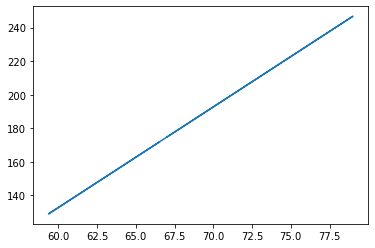

In [41]:
plt.plot(np.squeeze(xtest), reg.predict(xtest))       #best fit line

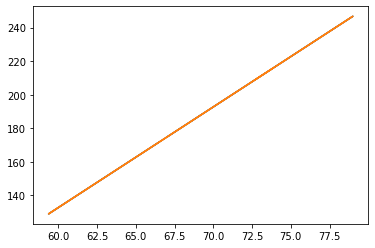

In [42]:
pred = reg.predict(xtest)
plt.plot(np.squeeze(xtest), pred)
plt.plot(df.Height , reg.predict(df[['Height']]))

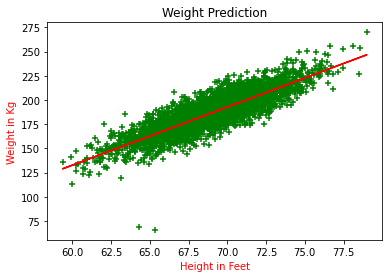

In [43]:
plt.scatter(df.Height, df.Weight, color='green', marker='+')
plt.xlabel('Height in Feet', color='red')
plt.ylabel('Weight in Kg', color='red')
plt.title('Weight Prediction', color='black')
plt.plot(df.Height , reg.predict(df[['Height']]), color='red')       #shows best fit line and also the prediction values

In [44]:
xtrain.head()

,Height
1546,67.940578
2384,71.579696
1184,66.601283
2741,68.868750
158,68.593336


In [45]:
xtrain.to_csv('H2.csv')                        #convert xtrain data to csv for testing 

In [46]:
H2=pd.read_csv('H2.csv')                       #read the converted data

In [47]:
H2.drop('Unnamed: 0', axis=1, inplace=True)    #Split the Height from H2 sheet

In [48]:
H2.head()

,Height
0,67.940578
1,71.579696
2,66.601283
3,68.868750
4,68.593336


In [49]:
reg.predict(H2)                              #predict the weight for test height

array([180.32700178, 202.19257917, 172.27987003, ..., 174.27345551,
       185.93783063, 192.05832138])

In [50]:
reg.score(xtest, ytest)*100                  # testing accuracy in percent

71.66840196151529

In [51]:
reg.score(xtrain, ytrain)*100                 # training accuracy in percent

73.92557635724583